# 🛒 Taller: Predicción de compras con árboles de decisión

**Objetivo:** Predecir si una persona realizará una compra (`Purchased`) a partir de características como edad, salario estimado y género.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv

--2025-04-09 21:21:01--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/titanic_train.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv [following]
--2025-04-09 21:21:01--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0.02s   

2025-04-09 21:21:01 (3.72 MB/s) - ‘tita

## 📥 1. Carga y exploración del dataset

In [6]:
import pandas as pd
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### ❓ Preguntas:
- ¿Cuántas observaciones y columnas tiene el dataset?
RTA: Hay 12 columnas y 891 observaciones

- ¿Cuál es la variable que queremos predecir?
RTA: Survived es la variable objetivo a predecir

- ¿Qué tipos de variables tenemos?
RTA: De todo, numéticas como Age, Parch, Fare... etc; y categóricas como Name, Sex, Cabin... etc

## 🛠️ 2. Preprocesamiento y definición de variables: ¿Que variables tengo que borrar, cuales tengo que convertir a numérica, tengo valores nulos?

In [9]:
df_dummies = pd.get_dummies(df, columns=["Sex","Embarked"], drop_first=True)
df_dummies.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


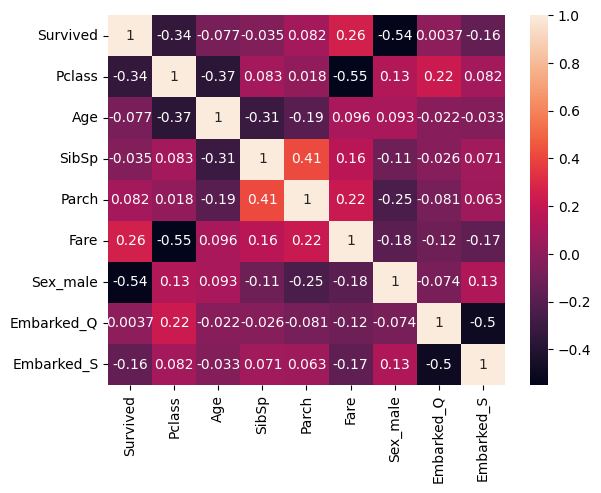

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_dummies.drop(columns=["PassengerId", "Name","Ticket","Cabin"]).corr(), annot=True)
plt.show()

In [11]:
X = df_dummies.drop(columns=["PassengerId", "Name","Ticket","Cabin"])
y = df_dummies["Survived"]

In [12]:
df_dummies["Survived"].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


### ❓ Pregunta:
- ¿Está balanceada la variable objetivo?
RTA: Vemos que está ligeramente desbalanceada, ya que hay más prpoporción de la clase 0 (Aquellos que no sobrevivieron)

## ✂️ 3. División del dataset

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## 🌳 4. Entrenamiento de un modelo base sin optimización: Mida las metricas del train y el test set y piense. ¿Hay evidencia de Overfiting?

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
y_pred_train = model.predict(X_train)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1-score:", f1_score(y_train, y_pred_train))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [16]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### ❓ Pregunta:
- ¿Qué tan bien predice el modelo base?
- ¿Existen diferencias entre precisión y recall?

RTA: Tal parece que el modelo es muy bueno, y no hay diferencias entre precisión y recall

## 🔁 5. Evaluación con validación cruzada

In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio (CV):", scores.mean())

Accuracy promedio (CV): 1.0


## 🔧 6. Optimización con GridSearchCV

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 5, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)

Mejores parámetros: {'max_depth': 2, 'min_samples_split': 2}
Mejor accuracy: 1.0


## ✅ 7. Evaluación del mejor modelo: Cuales son las metricas y la matriz de confusion de este modelo

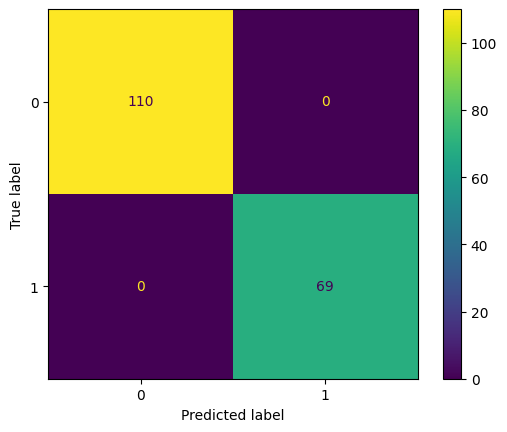

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)

## 📈 8. Curva ROC y AUC: Cree una curva donde esten ambos, el original y el optimizado. Mejoró la estimación?

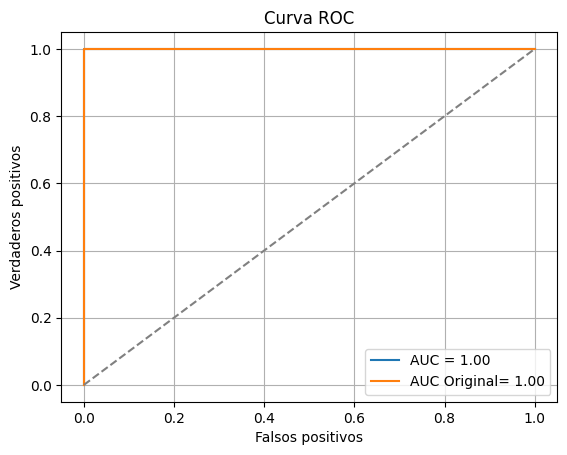

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_scores = best_model.predict_proba(X_test)[:, 1]
y_scores_or = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
fpr_or, tpr_or, _ = roc_curve(y_test, y_scores_or)

roc_auc = auc(fpr, tpr)
roc_auc_or = auc(fpr_or, tpr_or)


plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot(fpr_or, tpr_or, label=f'AUC Original= {roc_auc_or:.2f}')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

## 💬 Reflexión final

### ❓ Preguntas:
- ¿Qué combinación de hiperparámetros funcionó mejor?
- ¿Cuál fue la diferencia entre el modelo base y el optimizado?
- ¿Qué nos dice el área bajo la curva ROC sobre nuestro modelo?

Siento que no hay diferencia

El área bajo la curva ROC (AUC) es una medida del rendimiento general del modelo para distinguir entre las clases (en este caso, "Sobrevivió" y "No sobrevivió"). Un AUC cercano a 1 indica un modelo con un excelente rendimiento, mientras que un AUC cercano a 0.5 indica un modelo que no es mejor que una predicción aleatoria